<a href="https://colab.research.google.com/github/hrbae/DRB_ML_Training/blob/main/8th_day/%EC%8B%A4%EC%8A%B5/Two_Layer_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

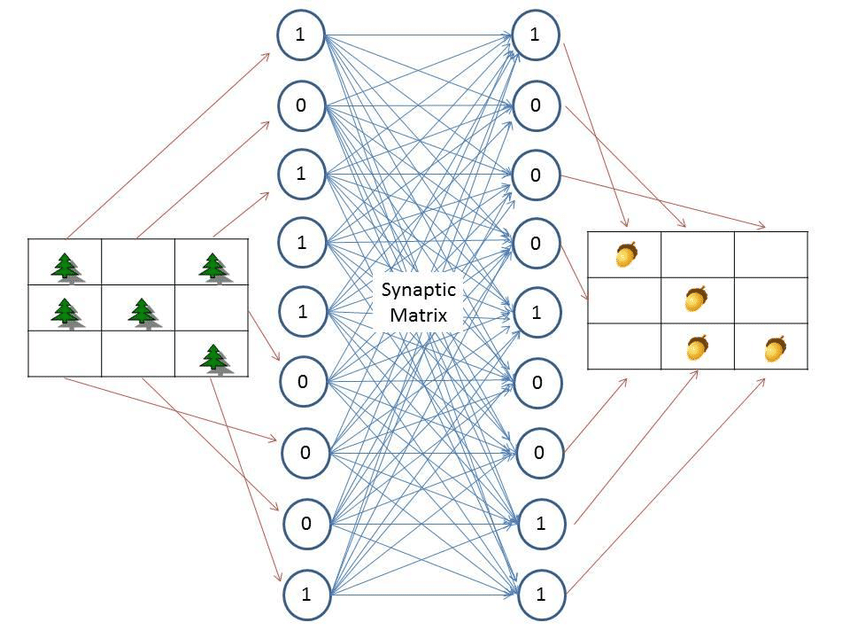

출처: https://www.researchgate.net/figure/A-simple-two-layer-neural-network-model-that-associates-an-input-pattern-with-an-output_fig1_283716760

# function.py

In [ ]:
"""
import numpy as np

def sigmoid(x):
  return 1/(1+np.exp(-x))

def softmax(x):
  if x.ndim == 2:
    x = x.T
    x = x - np.max(x, axis=0)
    y = np.exp(x) / np.sum(np.exp(x),axis=0)
    return y.T
  
  x = x - np.max(x)
  return np.exp(x) / np.sum(np.exp(x))

def gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x)

  for idx in range(x.size):
    tmp_x = x[idx]

    # f(x+h) 계산
    x[idx] = tmp_x + h
    fxh1 = f(x)

    # f(x-h) 계산
    x[idx] = tmp_x - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_x

  return grad

def sigmoid_grad(x):
  return (1.0 - sigmoid(x)) * sigmoid(x)

def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
  
  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arrange(batch_size), t] + 1e-7)) / batch_size
  """

# twolayernet.py

In [ ]:
"""
import numpy as np

class TwoLayerNet:
  # 초기화
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

  # 예측
  def predict(self, x):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

  # loss
  def loss(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)

    accuracy = np.sum(y==t) / float(x.shape[0])
    return accuracy

  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x,t)

    grads = {}
    grads['W1'] = gradient(loss_W, self.params['W1'])
    grads['b1'] = gradient(loss_W, self.params['b1'])
    grads['W2'] = gradient(loss_W, self.params['W2'])
    grads['b2'] = gradient(loss_W, self.params['b2'])

    return grads

  def train_grads(self, x, t):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']
    grads = {}

    batch_num = x.shape[0]

    # forward
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    # backward
    dy = (y-t) / batch_num
    grads['W2'] = np.dot(z1.T, dy)
    grads['b2'] = np.sum(dy, axis=0)

    da1 = np.dot(dy, W2.T)
    dz1 = sigmoid_grad(a1) * da1
    grads['W1'] = np.dot(x.T, dz1)
    grads['b1'] = np.sum(dz1, axis=0)

    return grads
"""

"\nimport numpy as np\n\nclass TwoLayerNet:\n  # 초기화\n  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):\n    self.params = {}\n    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)\n    self.params['b1'] = np.zeros(hidden_size)\n    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)\n    self.params['b2'] = np.zeros(output_size)\n\n  # 예측\n  def predict(self, x):\n    W1, W2 = self.params['W1'], self.params['W2']\n    b1, b2 = self.params['b1'], self.params['b2']\n\n    a1 = np.dox(x, W1) + b1\n    z1 = sigmoid(a1)\n    a2 = np.dot(z1, W2) + b2\n    y = softmax(a2)\n\n    return y\n\n  # loss\n  def loss(self, x, t):\n    y = self.predict(x)\n    y = np.argmax(y, axis=1)\n    t = np.argmax(t, axis=1)\n\n    accuracy = np.sum(y==t) / float(x.shape[0])\n    return accuracy\n\n  def numerical_gradient(self, x, t):\n    loss_W = lambda W: self.loss(x,t)\n\n    grads = {}\n    grads['W1'] = gradient(lo

# 실행코드

In [ ]:
from twolayernet import TwoLayerNet

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

In [ ]:
np.unique(t_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
t_train = to_categorical(t_train)
t_test = to_categorical(t_test)

In [ ]:
print(t_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
np.shape(x_train)

(60000, 28, 28)

In [ ]:
28 * 28

784

In [ ]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size = 10)

In [ ]:
iters_n = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

In [ ]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

In [ ]:
iter_per_epoch = max(train_size/ batch_size, 1)

In [ ]:
input_size = x_train.shape[1] *  x_train.shape[2]
x_train = np.reshape(x_train, [-1, input_size])
x_test = np.reshape(x_test, [-1, input_size])

print(np.shape(x_train))

(60000, 784)


In [ ]:
for i in range(iters_n):
  # 배치 결정
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  # 기울기 계산
  grad = network.train_grads(x_batch, t_batch)

  # 파라미터 업데이트
  for key in ('W1','b1','W2','b2'):
    network.params[key] -= learning_rate *grad[key]

  # 학습 결과 기록
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

  # 1에폭 당 정확도 계산
  if i % iter_per_epoch == 0:
    train_acc = network.loss(x_train, t_train)
    test_acc = network.loss(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print('train acc, test acc | ' + str(train_acc) + ", " +str(test_acc))

train acc, test acc | 0.15788333333333332, 0.1559


/content/function.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


train acc, test acc | 0.8302, 0.8346
train acc, test acc | 0.8622666666666666, 0.8604
train acc, test acc | 0.8538666666666667, 0.8562
train acc, test acc | 0.8650333333333333, 0.8677
train acc, test acc | 0.85465, 0.8537
train acc, test acc | 0.8468333333333333, 0.8526
train acc, test acc | 0.8541, 0.8538
train acc, test acc | 0.8600333333333333, 0.8616
train acc, test acc | 0.87665, 0.8763
train acc, test acc | 0.87065, 0.8691
train acc, test acc | 0.8703, 0.8737
train acc, test acc | 0.8699833333333333, 0.8741
train acc, test acc | 0.84485, 0.8519
train acc, test acc | 0.8727333333333334, 0.8759
train acc, test acc | 0.8766, 0.8773
train acc, test acc | 0.8772666666666666, 0.874


In [ ]:
markers = {'train': 'o', 'test':'s'}
x = np.arange(len(train_acc_list))

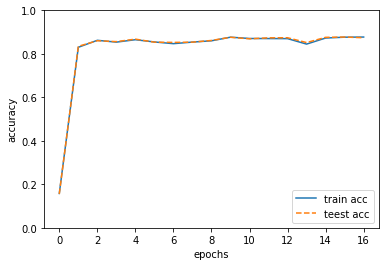

In [ ]:
plt.plot(x, train_acc_list, label = 'train acc')
plt.plot(x, test_acc_list, label = 'teest acc', linestyle = '--')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc = 'lower right')
plt.show()